In [25]:
import numpy as np
import pandas as pd

missing values: in most of the cases, real world data comes in incpmplete or with some data points unabvle to be captured.
    
    

In [26]:
data = pd.read_csv(r"C:\Users\97798\Desktop\diabetes.csv")

In [27]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
import seaborn as sns

In [30]:
cols = data.columns

In [31]:
cols


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
missing_numbers = (data[cols] == 0).sum()
print(missing_numbers)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Replacing Missing values (0) values with nan

In [32]:
data[cols] = data[cols].replace(0, np.nan)

In [33]:
data.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [34]:
data.head(15
         )

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,NaN
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,NaN
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0
9,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54,1.0


In [35]:
!pip install missingno

<AxesSubplot:>

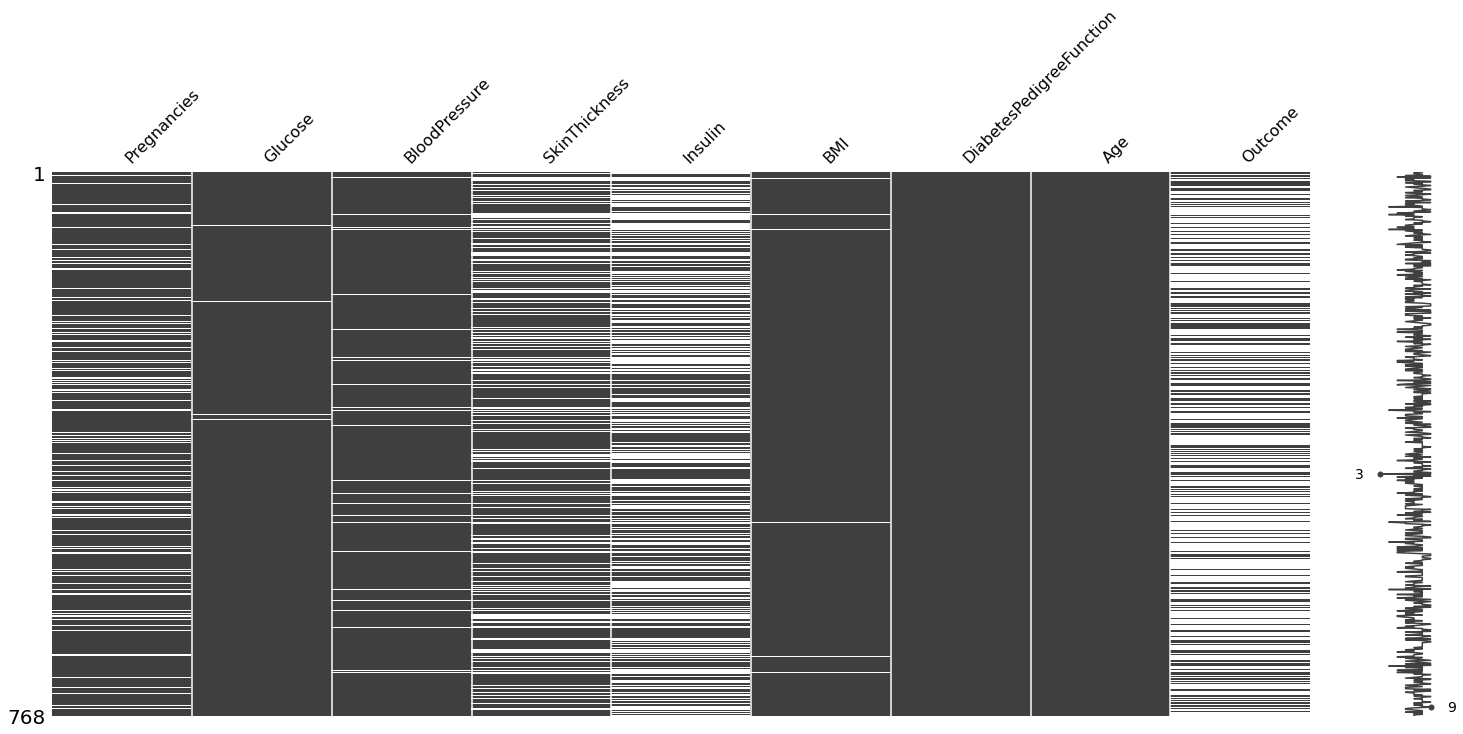

In [14]:
import missingno as msno
msno.matrix(data)

<AxesSubplot:>

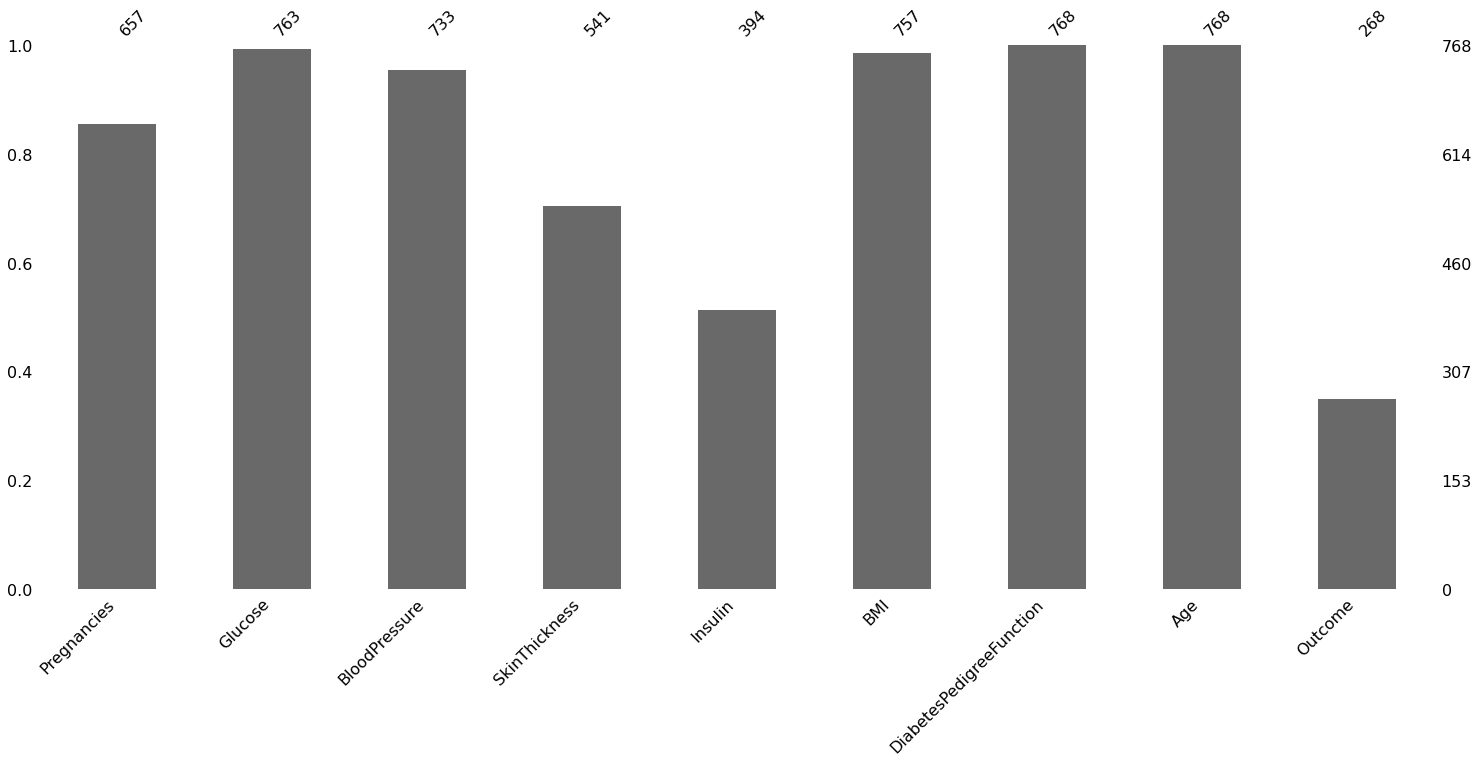

In [36]:
msno.bar(data)

Linear Discrimant Analysis

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [38]:
values = data.values
x= values[:,0:8]
y = values[:,8]

# define the model
model = LinearDiscriminantAnalysis()

In [17]:
# define the model evaluation procedure

cv = KFold(n_splits=3, shuffle=True, random_state=1)

result = cross_val_score(model,x,y,cv=cv,scoring='accuracy')

print('Accuracy: %.3f' %result.mean())

Accuracy: nan


C:\Users\97798\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\97798\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\97798\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 544, in fit
    X, y = self._validate_data(
  File "C:\Users\97798\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\97798\anaconda3\lib\s

dropping the nas values

1. Dropping entire rows and columns

In [39]:
print('Shape of dataset before dropping Nan:', data.shape)

data.dropna(inplace=True)

print('Shape of dataset after dropping nan:', data.shape)

Shape of dataset before dropping Nan: (768, 9)
Shape of dataset after dropping nan: (111, 9)


Try data with dropped na values

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


values = data.values
X= values[:,0:8]
y = values[:,8]

# define the model
model = LinearDiscriminantAnalysis()

# define the model evaluation procedure

cv = KFold(n_splits=5, shuffle=True, random_state=1)

result = cross_val_score(model,X,y,cv=cv,scoring='accuracy')

print('Accuracy: %.2f' % np.mean(result))

Accuracy: 1.00


Impute Missing values

<AxesSubplot:>

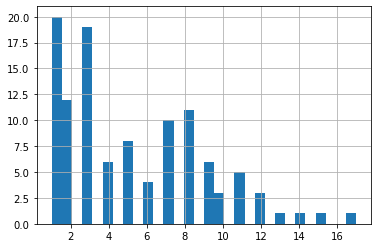

In [41]:
data.Pregnancies.hist(bins = 30)

<AxesSubplot:>

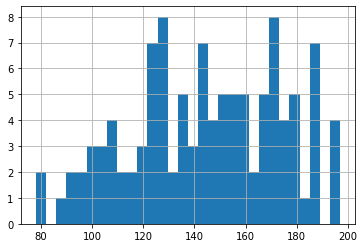

In [42]:
data.Glucose.hist(bins = 30)

<AxesSubplot:>

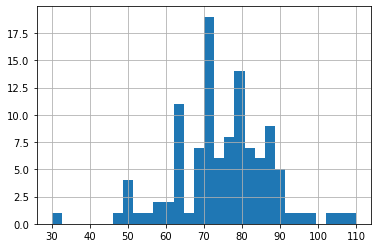

In [43]:
data.BloodPressure.hist(bins = 30)

<AxesSubplot:>

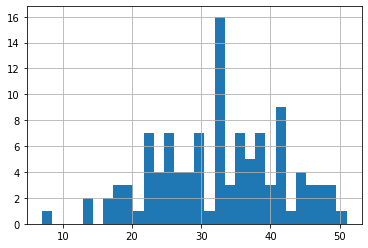

In [44]:
data.SkinThickness.hist(bins = 30)

<AxesSubplot:>

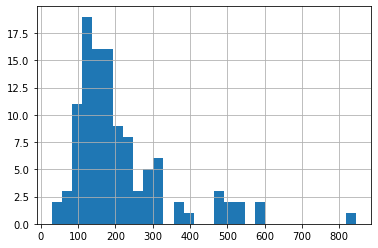

In [45]:
data.Insulin.hist(bins=30)

<AxesSubplot:>

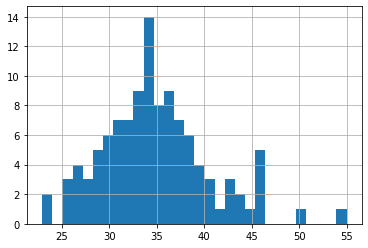

In [46]:
data.BMI.hist(bins = 30)

In [52]:
data.Pregnancies.fillna(data.Pregnancies.mode(), inplace = True)

In [48]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [50]:
data.Glucose.mode()

0    128.0
Name: Glucose, dtype: float64

In [51]:
data.Glucose.fillna(data.Pregnancies.mode(), inplace =True)

<AxesSubplot:>

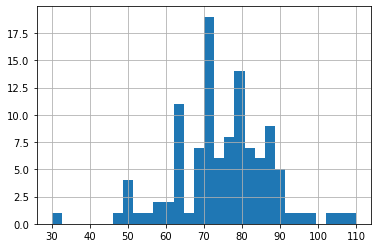

In [53]:
data.BloodPressure.hist(bins=30)

In [54]:
data.BloodPressure.fillna(data.Pregnancies.mean(), inplace =True)

<AxesSubplot:>

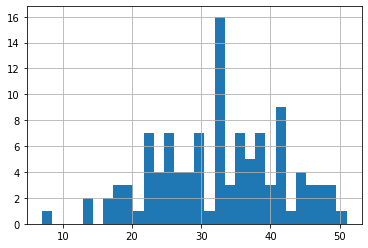

In [56]:
data.SkinThickness.hist(bins=30)

In [57]:
data.SkinThickness.mean()

32.549549549549546

In [58]:
data.SkinThickness.fillna(data.Pregnancies.mean(), inplace =True)

<AxesSubplot:>

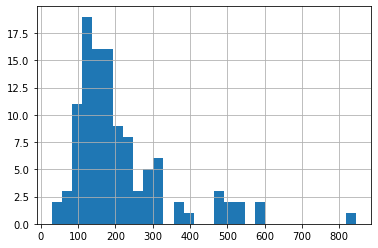

In [59]:
data.Insulin.hist(bins=30)

In [60]:
data.Insulin.fillna(data.Pregnancies.mode(), inplace =True)

<AxesSubplot:>

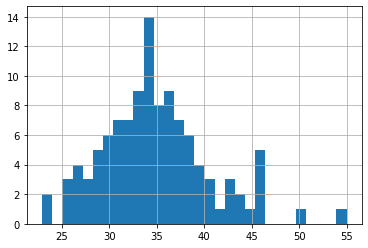

In [61]:
data.BMI.hist(bins=30)

In [62]:
data.BMI.mean()

34.82072072072072

In [63]:
data.BMI.fillna(data.Pregnancies.mode(), inplace =True)

<AxesSubplot:>

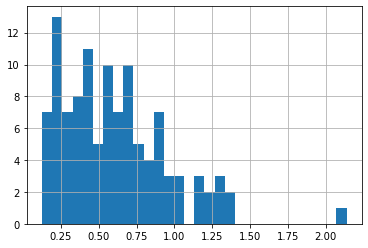

In [64]:
data.DiabetesPedigreeFunction.hist(bins =30)

In [66]:
data.DiabetesPedigreeFunction.fillna(data.Pregnancies.mode(), inplace =True)

<AxesSubplot:>

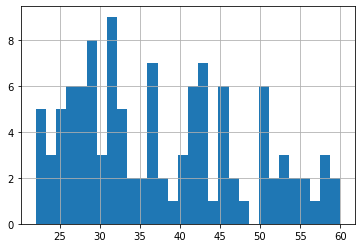

In [68]:
data.Age.hist(bins =30)

In [69]:
data.Age.fillna(data.Pregnancies.mean(), inplace =True)

<AxesSubplot:>

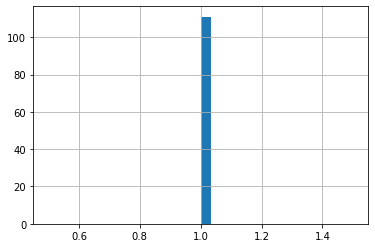

In [70]:
data.Outcome.hist(bins = 30)

In [72]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64